In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('complete_dataset.csv')

df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#Creating separate dataframes for both 'Population' and 'Income'

population_df  = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
population_df.to_csv('population_bangalore.csv')
population_df.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [5]:
income_df = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
income_df.to_csv('income_dataset.csv')
income_df.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [6]:
CLIENT_ID = 'CEEKX32KGCVPFZMQFWHO5DAURAPIRPWFYINUVIQOJWXX2E4Q'
CLIENT_SECRET = '123EGMYKD0Q4XTT3JGAL42BVJ31EKAMFIWIUMON5WDXW3245'
VERSION = '20200404'
LIMIT = 150

In [7]:
unique_boroughs = df['Borough'].unique().tolist()
unique_boroughs

borough_colors = {}

for i in unique_boroughs:
    
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
    

borough_colors

{'Central': '#064EE6',
 'Eastern': '#99922C',
 'NorthEastern': '#1583E1',
 'Northern': '#E239F9',
 'SouthEastern': '#36CC68',
 'Southern': '#DC9131',
 'SouthernSuburbs': '#2EA51B',
 'Western': '#264B09'}

In [8]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

bnglr_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [9]:
for lat,lng,boro,neigh in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + neigh
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bnglr_map)

bnglr_map

# 

# Exploring bangalore Neighborhoods using FourSquare API

In [10]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [11]:
venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [12]:
print("Total number of venues found in Bangalore are : ", venues.shape[0])
venues.head(5) 

Total number of venues found in Bangalore are :  601


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [13]:
venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

print("Total number of unique venue in bangalore are : ",len(venues['Venue Category'].unique()))

Total number of unique venue in bangalore are :  129


# 

# Getting number of venues per neighborhood

In [14]:
per_neighborhood_venue_count = venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
per_neighborhood_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
per_neighborhood_venue_count.reset_index(inplace=True)
per_neighborhood_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,64
3,Central,Jeevanbheemanagar,7
4,Central,Malleswaram,8
...,...,...,...
56,Western,Nagarbhavi,4
57,Western,Nandini Layout,1
58,Western,Nayandahalli,4
59,Western,Rajarajeshwari Nagar,6


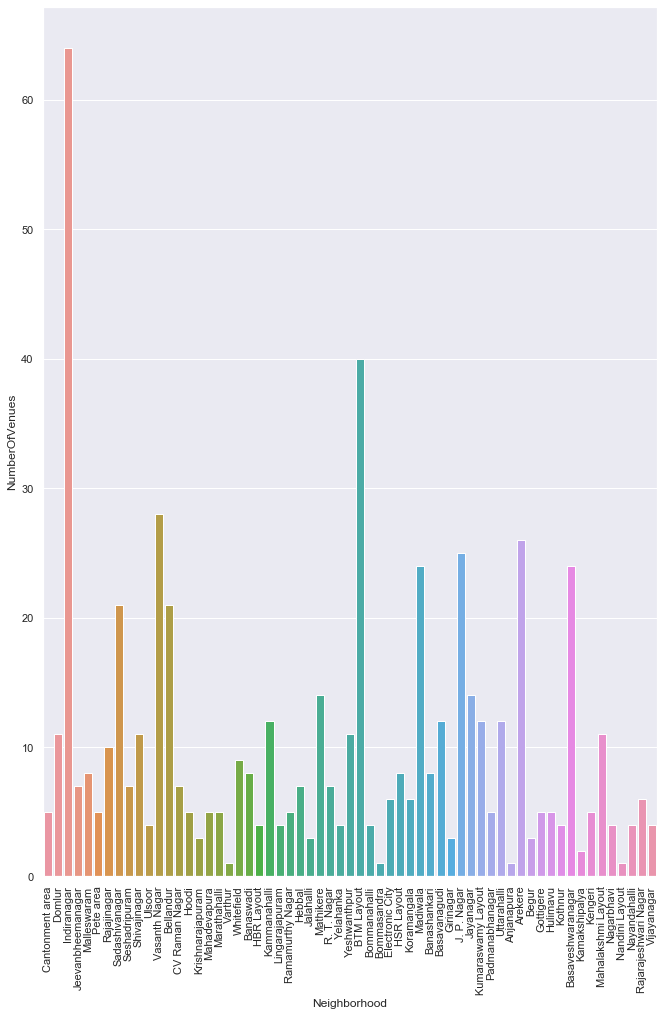

In [67]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data = per_neighborhood_venue_count)
plot.set_xticklabels(per_neighborhood_venue_count['Neighborhood'],rotation=90)
plt.savefig('venue.png')

From the above graph we can see that indiranagar has most number of venues....

In [18]:
# Exploring BTM Layout venues

venues_indiranagar = venues[venues['Neighborhood']=='Indiranagar']
venues_indiranagar

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
16,Indiranagar,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969913,77.641283,Chocolate Shop
17,Indiranagar,Central,12.971891,77.641151,Vero Moda,12.972808,77.641225,Boutique
18,Indiranagar,Central,12.971891,77.641151,The Black Rabbit,12.969891,77.641251,Pub
19,Indiranagar,Central,12.971891,77.641151,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
20,Indiranagar,Central,12.971891,77.641151,Bodycraft,12.968497,77.641289,Spa
...,...,...,...,...,...,...,...,...
75,Indiranagar,Central,12.971891,77.641151,Habanero,12.970073,77.639050,Mexican Restaurant
76,Indiranagar,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969679,77.641530,Pastry Shop
77,Indiranagar,Central,12.971891,77.641151,Allen Solly,12.968051,77.641239,Clothing Store
78,Indiranagar,Central,12.971891,77.641151,Cafe Coffee Day,12.975517,77.641099,Café


In [23]:
print("Number of Venues in indiranagar : {}".format(len(venues_indiranagar.Venue.unique())))
print("Number of unique venues categories in indiranagar : {}".format(len(venues_indiranagar['Venue Category'].unique())))

Number of Venues in indiranagar : 62
Number of unique venues categories in indiranagar : 33


In [32]:
TopVenue_categories_indiranagar = venues_indiranagar['Venue Category'].value_counts()
print("Below are top 10 venue categories and their count for Indiranagar :\n\n{}".format(TopVenue_categories_indiranagar.head(10)))

Below are top 10 venue categories and their count for Indiranagar :

Pub                   6
Lounge                5
Café                  5
Ice Cream Shop        4
Indian Restaurant     4
Cocktail Bar          3
Restaurant            3
Coffee Shop           2
Cupcake Shop          2
Italian Restaurant    2
Name: Venue Category, dtype: int64


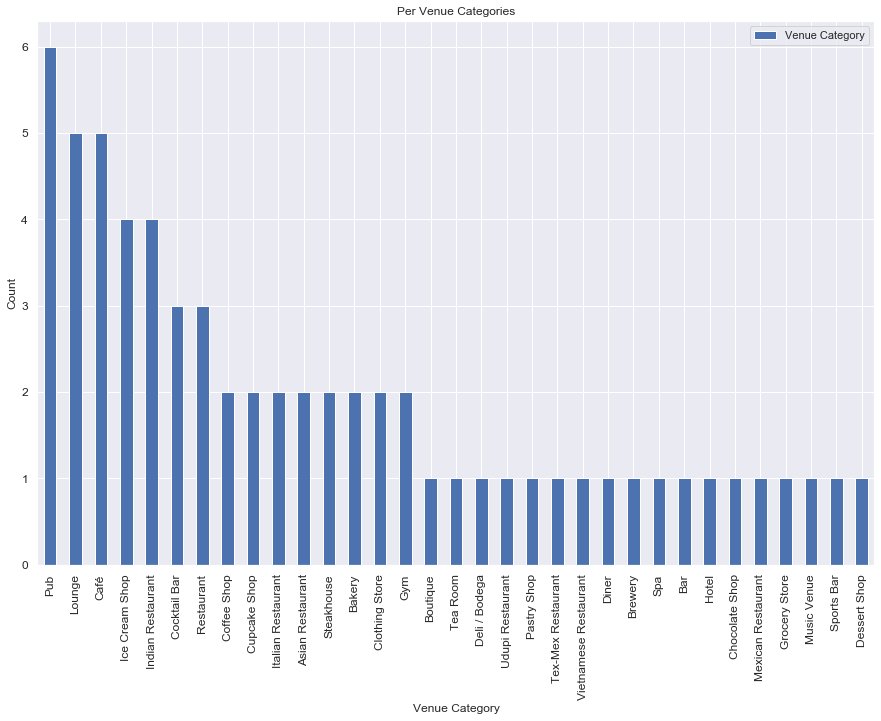

In [70]:
ax = TopVenue_categories_indiranagar.plot(kind='bar', title ="Per Venue Categories", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Venue Category", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

# 

In [37]:
# One hot encoding for different venues based on some common scale

venues_onehot = pd.get_dummies(venues[['Venue Category']])
venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
venues_onehot['Neighborhood'] =  venues['Neighborhood']
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
1,Arekere,0.00,0.0,0.000000,0.0,0.038462,0.0,0.0,0.038462,0.000000,...,0.038462,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
2,BTM Layout,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.075000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.050000,0.0,0.0,0.0
3,Banashankari,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
4,Banaswadi,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.125000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.125000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Vasanth Nagar,0.00,0.0,0.035714,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.035714,0.0,0.0,0.0
57,Vijayanagar,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.500000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
58,Whitefield,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.222222,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
59,Yelahanka,0.25,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0


In [39]:
number_of_top_venues = 5

for hood in venues_grouped['Neighborhood']:
    
    print('---------',hood,'---------')
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1     Venue Category_Italian Restaurant        0.0
2            Venue Category_Pizza Place        0.0
3               Venue Category_Pharmacy        0.0
4  Venue Category_Performing Arts Venue        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.19
1  Venue Category_Sporting Goods Shop       0.15
2          Venue Category_Pizza Place       0.08
3     Venue Category_Department Store       0.08
4         Venue Category_Liquor Store       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.20
1  Venue Category_Chinese Restaurant       0.10
2         Venue Category_Snack Place       0.08
3      Venue Category_Ice Cream Shop       0.08
4              Venue Category_Bakery       0.08


--------- Banash

                               Venue  Frequency
0                 Venue Category_ATM       0.50
1       Venue Category_Train Station       0.25
2   Venue Category_Electronics Store       0.25
3        Venue Category_Optical Shop       0.00
4  Venue Category_Mughlai Restaurant       0.00


--------- Madiwala ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.29
1  Venue Category_Fast Food Restaurant       0.12
2                  Venue Category_Café       0.08
3                Venue Category_Bakery       0.08
4   Venue Category_Indie Movie Theater       0.04


--------- Mahadevapura ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant        0.4
1      Venue Category_Shopping Mall        0.2
2  Venue Category_Convenience Store        0.2
3        Venue Category_Bus Station        0.2
4                Venue Category_ATM        0.0


--------- Mahalakshmi Layout ---------
                       

Frequency of each neighborhood and its top 5 venues Categories can be known. This will help us analyze top neighborhoods with most busy restaurants

In [40]:
def return_most_common_venues(row, number_of_top_venues):
    
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [41]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']

for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [42]:
# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

In [43]:
for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Diner
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Sporting Goods Shop,Venue Category_Fast Food Restaurant,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_BBQ Joint,Venue Category_French Restaurant,Venue Category_Diner
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Falafel Restaurant,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop


In [44]:
neighborhoods_venues_sorted.shape

(61, 11)

# Check for optimal k value for clustering 

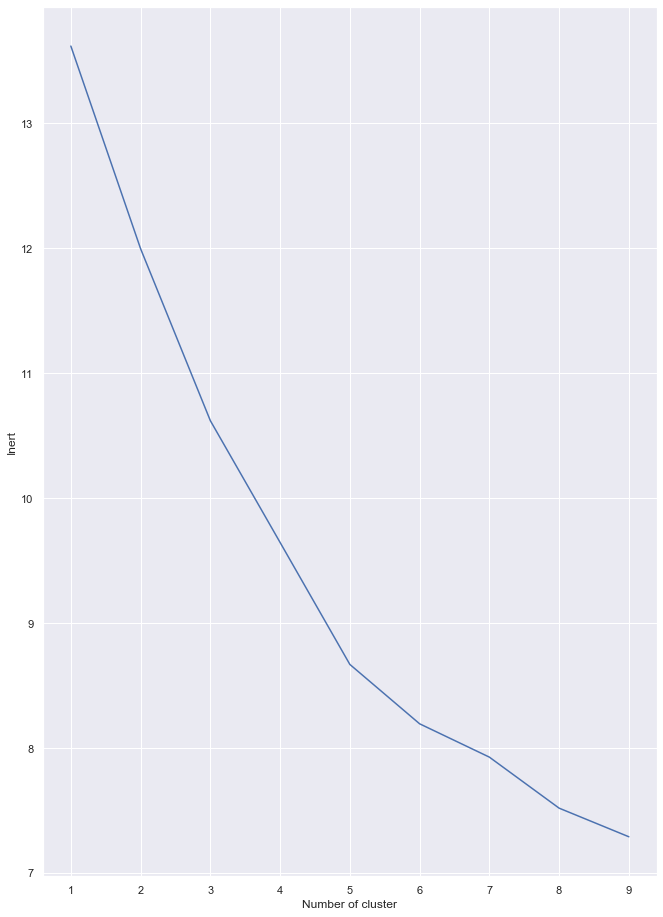

In [45]:
inert = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(venues_grouped.drop('Neighborhood',axis=1))
    venues_grouped['Cluster'] = kmeans.labels_
    inert[k] = kmeans.inertia_

plt.figure()
plt.plot(list(inert.keys()), list(inert.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inert")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [46]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [47]:
venues_grouped['Cluster'] = kmeans.labels_
venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    18
1    14
2     4
3     5
4    20
Name: Neighborhood, dtype: int64

In [48]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(venues_grouped,on='Neighborhood')

neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(venues,on='Neighborhood')
neighborhoods_venues_sorted.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anjanapura,Venue Category_ATM,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,2,SouthernSuburbs,12.8604,77.5612,State Bank of India ATM,12.861650,77.561634,ATM
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Breakfast Spot,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.5970,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Breakfast Spot,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.5970,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant


In [49]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [50]:
map_clusters

# Finding similar locations based on user perception
#### We need to analyze factors such as population and Income to recommend.

In [51]:
population_df['Normalized_population'] = population_df['Population']/population_df['Population'].max(axis=0)
population_df.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [52]:
income_df['Normalized_income'] = income_df['AverageIncome']/income_df['AverageIncome'].max(axis=0)
income_df.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [53]:
venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Recommending Veg restaurants

In [54]:
bangalore_veg = venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [55]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [56]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.head(5)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5


In [57]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

# Building a target neighborhood by providing a sample restaurant : say  for Neighbourhood ' Indiranagar '

In [58]:
cluster_df = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Indiranagar']

cluster_df.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,214,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969913,77.641283,Chocolate Shop
1,215,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Vero Moda,12.972808,77.641225,Boutique
2,216,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,The Black Rabbit,12.969891,77.641251,Pub
3,217,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
4,218,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Bodycraft,12.968497,77.641289,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,273,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Habanero,12.970073,77.639050,Mexican Restaurant
60,274,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969679,77.641530,Pastry Shop
61,275,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Allen Solly,12.968051,77.641239,Clothing Store
62,276,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,Venue Category_Italian Restaurant,...,0.0,0.0,1,Central,12.971891,77.641151,Cafe Coffee Day,12.975517,77.641099,Café


In [59]:
target_cluster = cluster_df.iloc[0].at['Cluster']
print("The target cluster is : ",target_cluster)

The target cluster is :  1


In [60]:
possible_neigh = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neigh.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
119,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,0.0,0.0,1,SouthernSuburbs,12.878800,77.637700,Star Bazaar,12.878350,77.637720,Supermarket
120,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,0.0,0.0,1,SouthernSuburbs,12.878800,77.637700,Dream Dots Interiors,12.881435,77.637897,Home Service
121,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,0.0,0.0,1,SouthernSuburbs,12.878800,77.637700,samsung smartcafe,12.875463,77.635910,Mobile Phone Shop
160,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,0.0,0.0,1,Central,12.960992,77.638726,Lavonne,12.963909,77.638579,Café
161,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,0.0,0.0,1,Central,12.960992,77.638726,Barbeque Nation,12.962684,77.641599,BBQ Joint


In [61]:
print("There are {} neighborhoods which has similar characteristics to Indiranagar.".format(possible_neigh.shape[0]))

There are 185 neighborhoods which has similar characteristics to Indiranagar.


In [66]:
possible_neigh.reset_index().head()

possible_neigh.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

# Creating ranking by combining population and income factors 


In [63]:

possible_neigh = possible_neigh.merge(population_df[['Neighborhoods','Population','Normalized_population']],
                                      on='Neighborhoods')

possible_neigh = possible_neigh.merge(income_df[['Neighborhoods','AverageIncome','Normalized_income']],
                                      on='Neighborhoods')

possible_neigh = possible_neigh.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],
                                      on='Neighborhoods')

possible_neigh.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,Star Bazaar,12.878350,77.637720,Supermarket,594887,0.604797,61640.098297,0.953525,0,1.0
1,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,Dream Dots Interiors,12.881435,77.637897,Home Service,594887,0.604797,61640.098297,0.953525,0,1.0
2,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,...,samsung smartcafe,12.875463,77.635910,Mobile Phone Shop,594887,0.604797,61640.098297,0.953525,0,1.0
3,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,Lavonne,12.963909,77.638579,Café,743186,0.755567,56837.022198,0.879225,0,1.0
4,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,Barbeque Nation,12.962684,77.641599,BBQ Joint,743186,0.755567,56837.022198,0.879225,0,1.0


In [64]:
possible_neigh['Ranking'] = possible_neigh['Normalized_population'] * 0.5 + possible_neigh['Normalized_income'] * 0.35 + possible_neigh['NumberOfNonVeganrestaurants'] * 0.1

recommended = possible_neigh.sort_values(by='Ranking',ascending=False)
recommended.reset_index(inplace=True, drop=True)

recommended.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,12.963907,77.641624,Bus Station,743186,0.755567,56837.022198,0.879225,0,1.0,0.785512
1,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,12.963834,77.641643,Rajasthani Restaurant,743186,0.755567,56837.022198,0.879225,0,1.0,0.785512
2,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,12.957096,77.638016,Pizza Place,743186,0.755567,56837.022198,0.879225,0,1.0,0.785512
3,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,12.963812,77.640660,Sandwich Place,743186,0.755567,56837.022198,0.879225,0,1.0,0.785512
4,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Bus Station,Venue Category_BBQ Joint,Venue Category_Chinese Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Sandwich Place,Venue Category_Art Museum,...,12.959348,77.638387,Indian Restaurant,743186,0.755567,56837.022198,0.879225,0,1.0,0.785512


In [65]:
top3 = recommended.groupby(['Neighborhoods',
                            '1st Most Common Venue',
                            '2nd Most Common Venue',
                            '3rd Most Common Venue'])['Ranking'].unique()

top3_df = pd.DataFrame(top3).reset_index()

top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Begur,Venue Category_Mobile Phone Shop,Venue Category_Supermarket,Venue Category_Home Service,[0.7361321887351776]
1,Domlur,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Indian Restaurant,[0.7855119911765059]
2,HBR Layout,Venue Category_North Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Road,[0.7540959810582033]


# Here, according the data, we see that 'Begur, Domlur and HBR Layout' are top 3 neighborhoods to find similar food to Indranagar restaurant's veg food !

#### Here our model will recommend these neighborneeds and top 3 common venues to visit.